In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier

/public/apps/python/3.7.0/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
integrin_rna = pd.read_csv('integrins_rna_primary_metastasis.csv', index_col=0)
for i in range(3,33):
    intg = integrin_rna.columns[i].split(' ')
    integrin_rna.rename(columns={integrin_rna.columns[i]: intg[0]}, inplace=True)
integrins_rna_breast = integrin_rna[integrin_rna["primary_disease"]=="Breast Cancer"].copy()
integrins_rna_breast.set_index('stripped_cell_line_name',inplace=True)
integrins_rna_breast

,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,ITGA5,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
stripped_cell_line_name,,,,,,,,,,,,,,,,,,,,,
ZR7530,Breast Cancer,Metastasis,0.014355,2.046142,0.028569,1.604071,0.389567,4.553361,0.042644,2.592158,...,0.150560,4.606442,7.654708,3.066950,0.536053,0.056584,0.056584,5.469560,11.437388,7.190319
EFM192A,Breast Cancer,Metastasis,0.310340,0.526069,0.014355,1.310340,0.704872,5.718362,0.189034,3.397803,...,0.150560,4.785027,5.088735,1.084064,1.879706,0.321928,0.124328,4.010780,11.436035,7.317232
SKBR3,Breast Cancer,Metastasis,0.526069,0.163499,0.084064,1.263034,0.659925,3.708187,0.124328,2.241840,...,0.070389,4.319040,7.204082,3.438293,0.214125,0.137504,0.056584,1.985500,10.844706,7.035294
UACC893,Breast Cancer,Primary,0.070389,0.475085,0.124328,2.906891,0.014355,5.942984,0.201634,2.778209,...,0.111031,6.836177,7.076816,5.200457,0.226509,0.070389,0.084064,3.035624,11.648582,9.178466
HCC38,Breast Cancer,Primary,1.250962,0.422233,0.389567,4.240314,2.370164,7.142720,4.936873,4.252476,...,5.000451,5.739308,7.382148,7.287989,0.757023,3.636915,1.851999,8.722193,7.115408,8.790739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZR751,Breast Cancer,Metastasis,0.111031,1.077243,0.163499,2.704872,2.289834,5.074249,0.310340,1.726831,...,0.464668,4.779785,4.296457,2.257011,1.244887,0.536053,0.389567,4.678635,6.756623,7.933868
BT549,Breast Cancer,Primary,0.124328,3.054848,0.464668,0.321928,0.641546,6.630522,3.420887,5.229588,...,0.855990,0.941106,5.025472,0.070389,0.070389,1.974529,2.028569,10.035486,4.135863,0.956057
COLO824,Breast Cancer,Metastasis,0.084064,1.454176,0.454176,3.058316,0.111031,2.127633,0.963474,0.823749,...,0.042644,4.133399,3.527321,0.097611,0.056584,4.228819,0.042644,9.311612,6.770036,9.385755


# identify top three features, ITGB8, ITGB6, ITGB1

['ITGB7' 'CD44' 'ITGA2' 'ITGA9' 'ITGA5' 'ITGA4' 'ITGAD' 'EPCAM' 'ITGAM'
 'ITGA8' 'ITGAX' 'ITGA6' 'ITGAL' 'ITGAV' 'ITGA10' 'ITGA7' 'ITGA2B' 'ITGB5'
 'ITGB2' 'ITGA1' 'ITGB3' 'ERBB2' 'ITGBL1' 'ITGA3' 'ITGA11' 'ITGAE' 'ITGB4'
 'ITGB6' 'ITGB8' 'ITGB1'] [0.03790504 0.06860711 0.09015857 0.12728832 0.15999466 0.16494459
 0.21225403 0.21518117 0.23052315 0.29004571 0.30860918 0.32029034
 0.34585117 0.36980542 0.37649772 0.37881526 0.39016464 0.41183117
 0.41969244 0.4424992  0.50317186 0.5768823  0.59641376 0.69864884
 0.75840888 0.77937471 0.81581374 0.8264434  0.91237356 1.        ]


Text(0.5, 0, 'Relative Feature Importance')

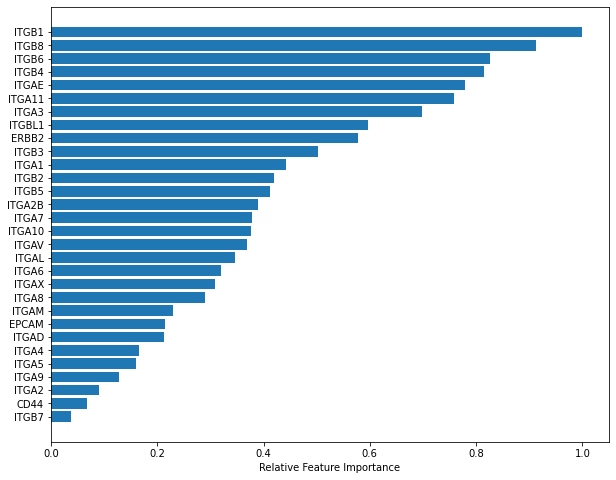

In [3]:
accuracy=[]
X=integrins_rna_breast.iloc[:,2:]
y=integrins_rna_breast['primary_or_metastasis']
#Scale data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train=X_scaled
y_train=y
X_test=X_scaled
y_test=y
classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
feature_importance = abs(classifier.coef_[0])
feature_importance =feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(10,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')
#RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8)
#plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
#plt.tight_layout()   
#plt.show()

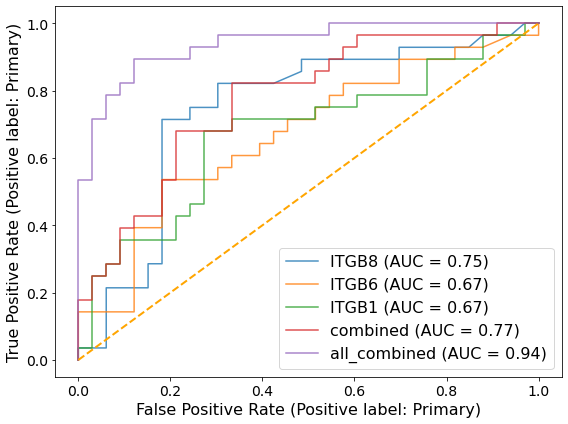

In [5]:
rna_roc = ['ITGB8','ITGB6', 'ITGB1','all_three_combined','all_combined']
fig,ax=plt.subplots(figsize=(8,6))
for integrin in rna_roc:
    if integrin=='all_three_combined':
        integrin=['ITGB8','ITGB6','ITGB1']
        accuracy=[]
        X=integrins_rna_breast.iloc[:,2:][integrin]
        y=integrins_rna_breast['primary_or_metastasis']
        #Scale data
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
        #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
        X_train=X_scaled
        y_train=y
        X_test=X_scaled
        y_test=y
        classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
        accuracy.append(accuracy_score(y_test,y_pred))
        feature_importance = abs(classifier.coef_[0])
        feature_importance =feature_importance / feature_importance.max()
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        #featfig = plt.figure(figsize=(10,8))
        #featax = featfig.add_subplot(1, 1, 1)
        #featax.barh(pos, feature_importance[sorted_idx], align='center')
        #print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
        #featax.set_yticks(pos)
        #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
        #featax.set_xlabel('Relative Feature Importance')
        RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8,name='combined',ax=ax)
    elif integrin=='all_combined':
        accuracy=[]
        X=integrins_rna_breast.iloc[:,2:]
        y=integrins_rna_breast['primary_or_metastasis']
        #Scale data
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
        #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
        X_train=X_scaled
        y_train=y
        X_test=X_scaled
        y_test=y
        classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
        accuracy.append(accuracy_score(y_test,y_pred))
        feature_importance = abs(classifier.coef_[0])
        feature_importance =feature_importance / feature_importance.max()
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        #featfig = plt.figure(figsize=(10,8))
        #featax = featfig.add_subplot(1, 1, 1)
        #featax.barh(pos, feature_importance[sorted_idx], align='center')
        #print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
        #featax.set_yticks(pos)
        #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
        #featax.set_xlabel('Relative Feature Importance')
        RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8,name='all_combined',ax=ax)        
    else:
        accuracy=[]
        X=integrins_rna_breast.iloc[:,2:][[integrin]]
        y=integrins_rna_breast['primary_or_metastasis']
        #Scale data
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
        #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
        X_train=X_scaled
        y_train=y
        X_test=X_scaled
        y_test=y
        classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
        accuracy.append(accuracy_score(y_test,y_pred))
        feature_importance = abs(classifier.coef_[0])
        feature_importance =feature_importance / feature_importance.max()
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        #featfig = plt.figure(figsize=(10,8))
        #featax = featfig.add_subplot(1, 1, 1)
        #featax.barh(pos, feature_importance[sorted_idx], align='center')
        #print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
        #featax.set_yticks(pos)
        #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
        #featax.set_xlabel('Relative Feature Importance')
        RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8,name=integrin,ax=ax)
        
ax.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
ax.legend(fontsize=16)
xlbl = ax.xaxis.get_label()
ylbl = ax.yaxis.get_label()
plt.setp(xlbl,fontsize=16)
plt.setp(ylbl,fontsize=16)
plt.setp(ax.get_xticklabels(),fontsize=14)
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.tight_layout()   
plt.savefig('top_features_roc_logistic_regression.jpg', dpi = 1000, bbox_inches='tight')


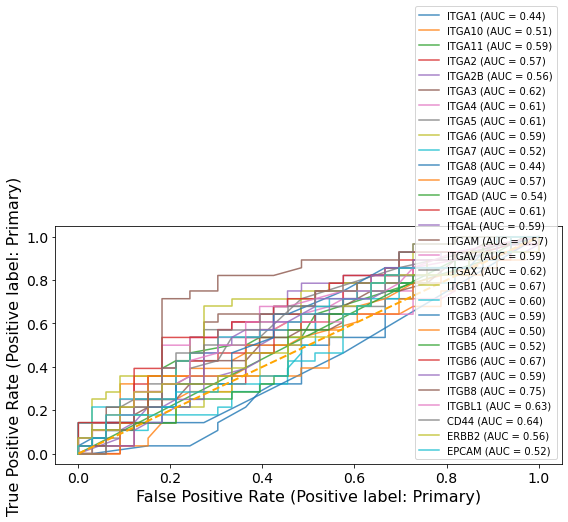

In [9]:
rna_roc = integrins_rna_breast.iloc[:,2:].columns
fig,ax=plt.subplots(figsize=(8,6))
for integrin in rna_roc:
    if integrin=='all_three_combined':
        integrin=['ITGB8','ITGB6','ITGB1']
        accuracy=[]
        X=integrins_rna_breast.iloc[:,2:][integrin]
        y=integrins_rna_breast['primary_or_metastasis']
        #Scale data
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
        #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
        X_train=X_scaled
        y_train=y
        X_test=X_scaled
        y_test=y
        classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
        accuracy.append(accuracy_score(y_test,y_pred))
        feature_importance = abs(classifier.coef_[0])
        feature_importance =feature_importance / feature_importance.max()
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        #featfig = plt.figure(figsize=(10,8))
        #featax = featfig.add_subplot(1, 1, 1)
        #featax.barh(pos, feature_importance[sorted_idx], align='center')
        #print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
        #featax.set_yticks(pos)
        #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
        #featax.set_xlabel('Relative Feature Importance')
        RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8,name='combined',ax=ax)
    else:
        accuracy=[]
        X=integrins_rna_breast.iloc[:,2:][[integrin]]
        y=integrins_rna_breast['primary_or_metastasis']
        #Scale data
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
        #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
        X_train=X_scaled
        y_train=y
        X_test=X_scaled
        y_test=y
        classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
        accuracy.append(accuracy_score(y_test,y_pred))
        feature_importance = abs(classifier.coef_[0])
        feature_importance =feature_importance / feature_importance.max()
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        #featfig = plt.figure(figsize=(10,8))
        #featax = featfig.add_subplot(1, 1, 1)
        #featax.barh(pos, feature_importance[sorted_idx], align='center')
        #print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
        #featax.set_yticks(pos)
        #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
        #featax.set_xlabel('Relative Feature Importance')
        RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8,name=integrin,ax=ax)
        
ax.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
#ax.legend(fontsize=16)
xlbl = ax.xaxis.get_label()
ylbl = ax.yaxis.get_label()
plt.setp(xlbl,fontsize=16)
plt.setp(ylbl,fontsize=16)
plt.setp(ax.get_xticklabels(),fontsize=14)
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.tight_layout()   
#plt.savefig('top_features_roc_logistic_regression.jpg', dpi = 1000, bbox_inches='tight')
